# Base model simulation tutorial
Load simple model from YAML, and run the simulation

## Setup

In [1]:
import logging
import sys

root = logging.getLogger()
if root.handlers:
    root.handlers.clear()

logging.basicConfig(
    level=logging.INFO,
    stream=sys.stdout,
    format="%(asctime)s %(name)s %(levelname)s: %(message)s",
)

In [2]:
from epymodelingsuite.config_loader import (
    setup_epimodel_from_config,
    load_model_config_from_file,
    validate_config
)

In [3]:
from epydemix.visualization import plot_quantiles
from epydemix import EpiModel

import matplotlib.pyplot as plt

## Load and setup model

In [4]:
# Load model configuration from YAML file
# This returns a validated config instance
model_config = load_model_config_from_file("data/input.yml")

2025-08-25 16:48:15,873 flumodelingsuite.config_validator INFO: Configuration validated successfully.
2025-08-25 16:48:15,874 flumodelingsuite.config_loader INFO: Configuration loaded successfully.


In [5]:
# Now, we construct an EpiModel using that config
model = setup_epimodel_from_config(model_config)

2025-08-25 16:48:18,476 flumodelingsuite.config_loader INFO: Model population set to: United_States_New_York
2025-08-25 16:48:18,476 flumodelingsuite.config_loader INFO: Added compartments: ['S', 'S_vax', 'L', 'L_vax', 'I', 'R', 'R_vax']
2025-08-25 16:48:18,477 flumodelingsuite.config_loader INFO: Added mediated transition: S -> L (mediator: I, rate: beta)
2025-08-25 16:48:18,477 flumodelingsuite.config_loader INFO: Added spontaneous transition: I -> R (rate: mu)
2025-08-25 16:48:18,477 flumodelingsuite.config_loader INFO: Added parameters: ['vaccine_effectiveness', 'beta', 'mu', 'delta']
2025-08-25 16:48:18,483 flumodelingsuite.config_loader INFO: Added seasonality to parameter beta
2025-08-25 16:48:18,539 flumodelingsuite.config_loader INFO: Created vaccination schedule from scenario data at data/vaccine_scenarios_2425_cd.csv
2025-08-25 16:48:18,542 flumodelingsuite.config_loader INFO: Added vaccination transition: S -> S_vax
2025-08-25 16:48:18,545 flumodelingsuite.config_loader INF

In [6]:
model

EpiModel(name='flu_round05')
Compartments: 7
  S, S_vax, L, L_vax, I, R, R_vax
Transitions: 4
  Transitions between compartments:
    S -> L, params: ('beta', 'I') (kind: mediated)
    I -> R, params: mu (kind: spontaneous)
    S -> S_vax, params: (array([[ 472. , 1187.6, 1060.8,  642.6,  251.2],
       [ 472. , 1187.6, 1060.8,  642.6,  251.2],
       [ 472. , 1187.6, 1060.8,  642.6,  251.2],
       ...,
       [   0. ,    0. ,    0. ,    0. ,    0. ],
       [   0. ,    0. ,    0. ,    0. ,    0. ],
       [   0. ,    0. ,    0. ,    0. ,    0. ]], shape=(1830, 5)),) (kind: vaccination)
    L -> L_vax, params: (array([[ 472. , 1187.6, 1060.8,  642.6,  251.2],
       [ 472. , 1187.6, 1060.8,  642.6,  251.2],
       [ 472. , 1187.6, 1060.8,  642.6,  251.2],
       ...,
       [   0. ,    0. ,    0. ,    0. ,    0. ],
       [   0. ,    0. ,    0. ,    0. ,    0. ],
       [   0. ,    0. ,    0. ,    0. ,    0. ]], shape=(1830, 5)),) (kind: vaccination)
Parameters: 4
  Model parameters:


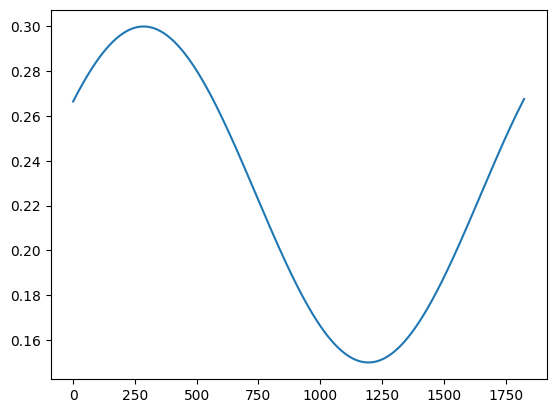

In [7]:
plt.plot(model.parameters.get('beta'))

## Run simulation

In [8]:
date_start = model_config.model.simulation.start_date
date_end = model_config.model.simulation.end_date
delta_t = model_config.model.simulation.delta_t

In [9]:
results = model.run_simulations(
    start_date=date_start,
    end_date=date_end,
    initial_conditions_dict={
        "S": (0.99 * model.population.Nk),
        "L": (0.01 * model.population.Nk),
    },
    dt=delta_t
)


In [10]:
df_quantiles = results.get_quantiles_compartments()

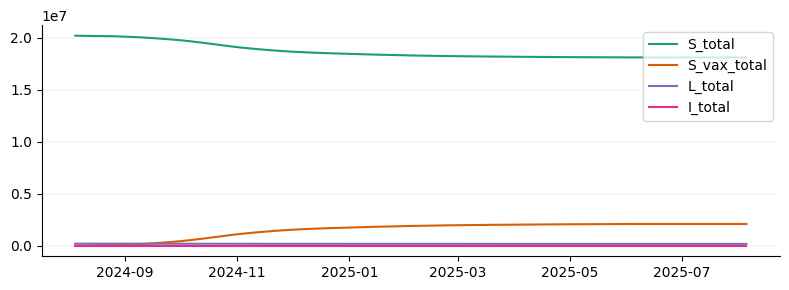

In [11]:
fig, ax = plt.subplots(1,1, figsize=(8,3))

# ax.scatter(x, y, marker='o', lw=0)

plot_quantiles(df_quantiles, columns=["S_total", "S_vax_total", "L_total", "I_total"], legend_loc="best", ax=ax)

ax.legend(loc='upper right', frameon=True)

fig.tight_layout()
# plt.savefig('fig/fig_name.pdf', bbox_inches='tight')
plt.show()